# Mushroom Classification
### Safe to eat or deadly poison?

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
dat=pd.read_csv('C:/Users/pruth/Desktop/mushroom-classification/mushrooms.csv')
dat.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
(dat.iloc[:, 1:13].describe())

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4
top,x,y,n,f,n,f,c,b,b,t,b,s
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176


In [4]:
dat.iloc[:, 13:].describe()

,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,4,9,9,1,4,3,5,9,6,7
top,s,w,w,p,w,o,p,w,v,d
freq,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


So, there are no continuous variables

Thus, label encode them

In [5]:
df=dat.apply(LabelEncoder().fit_transform)

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


BOOM.. 

#### seperate the y and x values, and also train test

In [7]:
X_train, X_test, Y_train, Y_test=train_test_split(df.iloc[:, 1:], df.iloc[:, :1], test_size=0.20, random_state=13091)

now, check the correlation among the variables to check how much one another are dependent

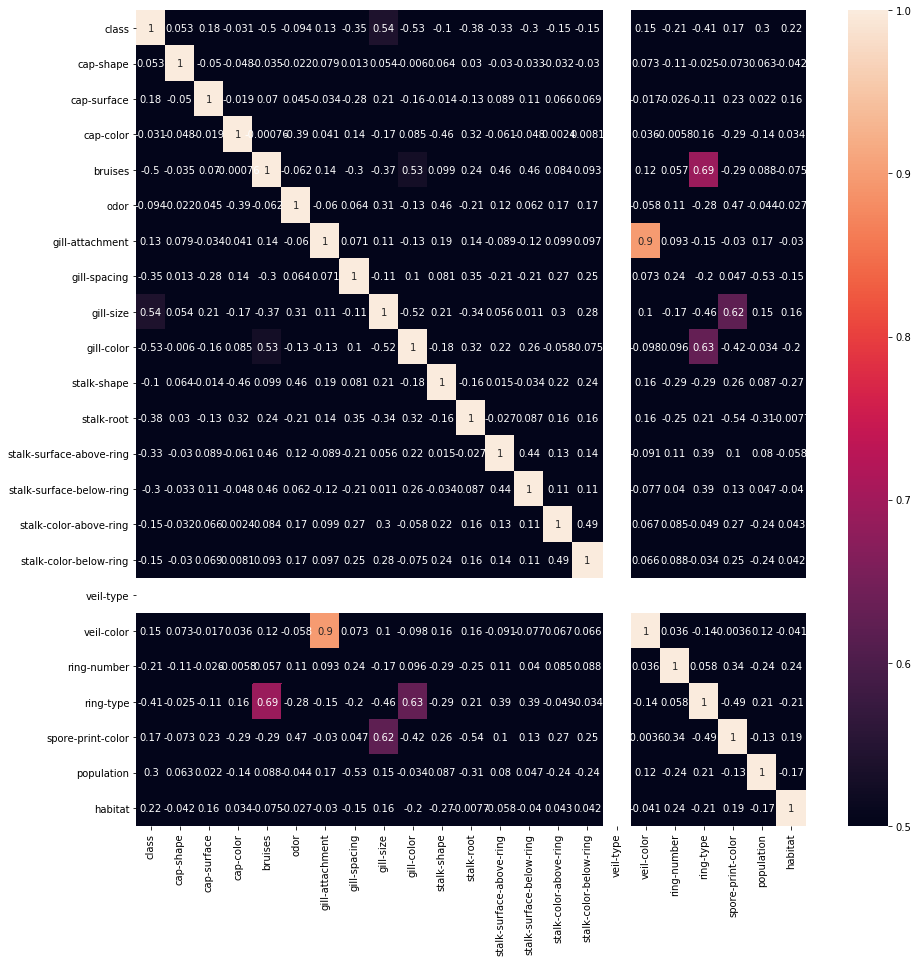

In [8]:
cor=df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(cor, annot=True, vmin=0.5)

So ,bruises and ring type, gill-attachment and veil-Color, gillsize and sport-print-color, gill color and ring-type are dependent on each other

To Decrease harmful bias
and to make learning faster,

lets remove ring-type, gill attachment, veil type  (Corr > 0.65)

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
del(X_train["gill-attachment"])
del(X_train["ring-type"])
del(X_train["veil-type"])

#### Convert Data to Tensors

In [11]:
X_dat=np.array(X_train)
x_data=torch.Tensor(X_dat)
Y_dat=np.array(Y_train)
y_data=torch.Tensor(Y_dat.reshape(Y_train.shape[0], 1))

## Create Model from pyTorch

#### Architechture:

    1. a. l1 = Dense layer (inp= 19 features, out=500 hidden features) 
     
       b. relu1 = ReLU()
  
    2. a. l2 = Dense layer (inp= 500 features, out=400 hidden features)
     
       b. relu2 = ReLU()
  
    3. a. l3= Dense layer (inp= 400 features, out=300 hidden features)
     
       b. relu3= ReLU()

    4. a. l4= Dense layer (inp= 300 features, out=200 hidden features)
     
       b. relu4= ReLU()

    5. a. l5= Dense layer (inp= 200 features, out= binary)

In [12]:
class Model(nn.Module):
    def __init__(self, inp_size, H1, H2, H3, H4, out_size):
        super().__init__()
        self.l1=nn.Linear(inp_size, H1)
        self.relu1=nn.ReLU()
        self.l2=nn.Linear(H1, H2)
        self.relu2=nn.ReLU()
        self.l3=nn.Linear(H2, H3)
        self.relu3=nn.ReLU()
        self.l4=nn.Linear(H3, H4)
        self.relu4=nn.ReLU()
        self.l5=nn.Linear(H4, out_size)
        
    def forward(self, X):
        return self.l5(self.relu4(self.l4(self.relu3(self.l3(self.relu2(self.l2(self.relu1(self.l1(X)))))))))

In [13]:
H1=500
H2=400
H3=300
H4=200
model=Model(X_train.shape[1], H1, H2, H3, H4, 1)

### Print model

In [14]:
model

Model(
  (l1): Linear(in_features=19, out_features=500, bias=True)
  (relu1): ReLU()
  (l2): Linear(in_features=500, out_features=400, bias=True)
  (relu2): ReLU()
  (l3): Linear(in_features=400, out_features=300, bias=True)
  (relu3): ReLU()
  (l4): Linear(in_features=300, out_features=200, bias=True)
  (relu4): ReLU()
  (l5): Linear(in_features=200, out_features=1, bias=True)
)

In [15]:
loss_fn=nn.MSELoss(reduction='sum')

In [16]:
learning_rate=0.001
epochs=1500

### Training session

In [17]:
losses=[]
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(epochs):
    y_pred=model(x_data)
    loss=loss_fn(y_pred, y_data)
    losses.append(loss.item())
    if(loss.item()<0.005):
        break
    print(t, "loss = ", loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 loss =  3544.11181640625
1 loss =  1960.847412109375
2 loss =  1695.1063232421875
3 loss =  1397.6689453125
4 loss =  1188.3541259765625
5 loss =  1044.7755126953125
6 loss =  894.0555419921875
7 loss =  821.9552001953125
8 loss =  779.3952026367188
9 loss =  716.321533203125
10 loss =  686.4520263671875
11 loss =  672.51904296875
12 loss =  642.2020263671875
13 loss =  595.348388671875
14 loss =  546.5931396484375
15 loss =  521.8834228515625
16 loss =  511.944091796875
17 loss =  486.9394226074219
18 loss =  465.3802795410156
19 loss =  454.5458984375
20 loss =  435.0701599121094
21 loss =  418.2383117675781
22 loss =  415.65838623046875
23 loss =  408.0907287597656
24 loss =  388.65252685546875
25 loss =  377.80694580078125
26 loss =  373.5458068847656
27 loss =  360.494140625
28 loss =  346.58770751953125
29 loss =  338.0403137207031
30 loss =  327.35577392578125
31 loss =  314.22650146484375
32 loss =  305.80120849609375
33 loss =  300.1534423828125
34 loss =  289.484375
35 loss

273 loss =  2.0238096714019775
274 loss =  2.086190700531006
275 loss =  1.976304531097412
276 loss =  1.9409931898117065
277 loss =  1.9340791702270508
278 loss =  1.8403761386871338
279 loss =  1.8623528480529785
280 loss =  1.7775920629501343
281 loss =  1.767164945602417
282 loss =  1.7406407594680786
283 loss =  1.6779111623764038
284 loss =  1.682796835899353
285 loss =  1.6222249269485474
286 loss =  1.6151922941207886
287 loss =  1.5680418014526367
288 loss =  1.5508228540420532
289 loss =  1.5263643264770508
290 loss =  1.4867289066314697
291 loss =  1.4761059284210205
292 loss =  1.437111258506775
293 loss =  1.4271509647369385
294 loss =  1.38783597946167
295 loss =  1.379372000694275
296 loss =  1.3444269895553589
297 loss =  1.3292607069015503
298 loss =  1.3008991479873657
299 loss =  1.284929633140564
300 loss =  1.25680673122406
301 loss =  1.2423551082611084
302 loss =  1.2155052423477173
303 loss =  1.2009960412979126
304 loss =  1.1749347448349
305 loss =  1.16145586

535 loss =  0.19919836521148682
536 loss =  0.19538672268390656
537 loss =  0.19352641701698303
538 loss =  0.19361771643161774
539 loss =  0.19498254358768463
540 loss =  0.19677162170410156
541 loss =  0.19848428666591644
542 loss =  0.19918468594551086
543 loss =  0.19909287989139557
544 loss =  0.19740939140319824
545 loss =  0.1952144205570221
546 loss =  0.19246065616607666
547 loss =  0.18992935121059418
548 loss =  0.18770739436149597
549 loss =  0.18593399226665497
550 loss =  0.1844422072172165
551 loss =  0.18327555060386658
552 loss =  0.1822766810655594
553 loss =  0.18143624067306519
554 loss =  0.18072880804538727
555 loss =  0.18009954690933228
556 loss =  0.17954997718334198
557 loss =  0.17914298176765442
558 loss =  0.1789880394935608
559 loss =  0.17907224595546722
560 loss =  0.17989163100719452
561 loss =  0.18166197836399078
562 loss =  0.18544021248817444
563 loss =  0.19186729192733765
564 loss =  0.20364513993263245
565 loss =  0.2210587114095688
566 loss =  0

793 loss =  0.15767870843410492
794 loss =  0.11536433547735214
795 loss =  0.09395269304513931
796 loss =  0.09627276659011841
797 loss =  0.11541572213172913
798 loss =  0.14018818736076355
799 loss =  0.1637105792760849
800 loss =  0.17427289485931396
801 loss =  0.17586368322372437
802 loss =  0.16061893105506897
803 loss =  0.14005430042743683
804 loss =  0.11632674187421799
805 loss =  0.09889118373394012
806 loss =  0.09029622375965118
807 loss =  0.0905754566192627
808 loss =  0.09730533510446548
809 loss =  0.1074124202132225
810 loss =  0.11882160604000092
811 loss =  0.1286061704158783
812 loss =  0.13809332251548767
813 loss =  0.14290675520896912
814 loss =  0.1463819295167923
815 loss =  0.14385434985160828
816 loss =  0.14036114513874054
817 loss =  0.13243792951107025
818 loss =  0.12470366060733795
819 loss =  0.11514589190483093
820 loss =  0.10678374022245407
821 loss =  0.09915926307439804
822 loss =  0.0933428555727005
823 loss =  0.08930980414152145
824 loss =  0.

1049 loss =  0.45778653025627136
1050 loss =  0.3194764256477356
1051 loss =  0.15254347026348114
1052 loss =  0.07151608914136887
1053 loss =  0.09819172322750092
1054 loss =  0.19032488763332367
1055 loss =  0.2937420904636383
1056 loss =  0.35073935985565186
1057 loss =  0.37441226840019226
1058 loss =  0.32531359791755676
1059 loss =  0.2528919577598572
1060 loss =  0.1608654111623764
1061 loss =  0.09268949180841446
1062 loss =  0.06397734582424164
1063 loss =  0.07605248689651489
1064 loss =  0.11269448697566986
1065 loss =  0.15003402531147003
1066 loss =  0.17380616068840027
1067 loss =  0.17129483819007874
1068 loss =  0.15338900685310364
1069 loss =  0.12281161546707153
1070 loss =  0.09401066601276398
1071 loss =  0.07182960212230682
1072 loss =  0.060582734644412994
1073 loss =  0.05995006859302521
1074 loss =  0.0672278180718422
1075 loss =  0.0789768248796463
1076 loss =  0.09186602383852005
1077 loss =  0.1053939089179039
1078 loss =  0.11626143753528595
1079 loss =  0.1

1299 loss =  0.0463644415140152
1300 loss =  0.04765593633055687
1301 loss =  0.05217329412698746
1302 loss =  0.058130573481321335
1303 loss =  0.06391451507806778
1304 loss =  0.06895765662193298
1305 loss =  0.07225627452135086
1306 loss =  0.07459460943937302
1307 loss =  0.0753314197063446
1308 loss =  0.07565326243638992
1309 loss =  0.07494636625051498
1310 loss =  0.07439755648374557
1311 loss =  0.07346373796463013
1312 loss =  0.07319974899291992
1313 loss =  0.07301434129476547
1314 loss =  0.07385019212961197
1315 loss =  0.07510605454444885
1316 loss =  0.07786475867033005
1317 loss =  0.08142361044883728
1318 loss =  0.0872565358877182
1319 loss =  0.09456612914800644
1320 loss =  0.1057315394282341
1321 loss =  0.11957944929599762
1322 loss =  0.14041513204574585
1323 loss =  0.16583599150180817
1324 loss =  0.20513182878494263
1325 loss =  0.25270962715148926
1326 loss =  0.3279082775115967
1327 loss =  0.4161536991596222
1328 loss =  0.55690997838974
1329 loss =  0.707

### Plot loss vs epochs

Text(0, 0.5, 'MSE Loss')

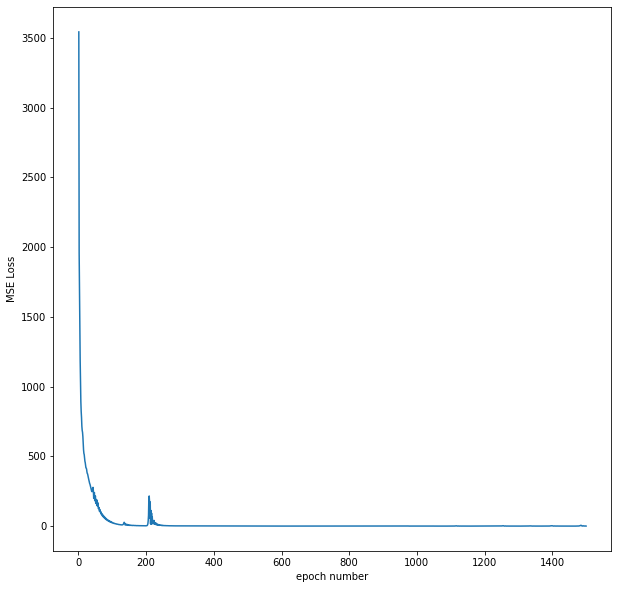

In [19]:
epoch_no=[]
for i in range(len(losses)):
    epoch_no.append(i+1)
plt.figure(figsize=(10, 10))
plt.plot(epoch_no, losses)
plt.xlabel('epoch number')
plt.ylabel('MSE Loss')

### Test with the remaining test data

In [20]:
del(X_test["gill-attachment"])
del(X_test["ring-type"])
del(X_test["veil-type"])


X_dat_t=np.array(X_test)
x_data_test=torch.Tensor(X_dat_t)
Y_dat_t=np.array(Y_test)
y_data_test=torch.Tensor(Y_dat_t.reshape(Y_test.shape[0], 1))

In [21]:
y_test_pred=model(x_data_test)

In [22]:
y1=y_test_pred.detach().numpy()
y1=y1.astype(int)
y2=y_data_test.detach().numpy()
y2=y2.astype(int)

### Print Accuracy of the model

In [23]:
accuracy_score(y1, y2)

0.9729230769230769